<a href="https://colab.research.google.com/github/dguti97/Taller1_ANN/blob/master/Seccion2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Input, AveragePooling2D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.optimizers import SGD, rmsprop
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, np_utils
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
from __future__ import print_function
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import os

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
get_ipython().system_raw("unrar x train_images.rar")
#get_ipython().system_raw("unrar x test_images.rar")

In [0]:
train = pd.read_csv('train_labels.csv')
train

,Id,Expected
0,train_0,vault
1,train_1,flying_buttress
2,train_2,stained_glass
3,train_3,vault
4,train_4,vault
...,...,...
9207,train_9207,gargoyle
9208,train_9208,dome_outer
9209,train_9209,column
9210,train_9210,vault


In [0]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train_images/'+'train_'+str(i)+'.jpg',grayscale=False)
    img = image.img_to_array(img)
    img = img.astype(np.float32)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 9212/9212 [00:06<00:00, 1512.62it/s]


In [0]:
X_mean = np.mean(X, axis=0)
X -= X_mean

Se tienen 9212 imagenes de 128x128 pixeles cada una.

In [0]:
X.shape

(9212, 128, 128, 3)

In [0]:
labels = ['vault','flying_buttress','stained_glass','dome_outer','dome_inner','bell_tower','column','gargoyle','apse','altar']
y = pd.factorize(train.Expected)[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


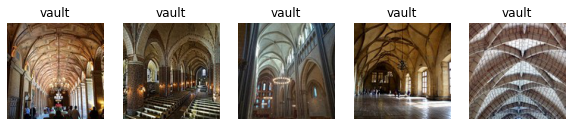

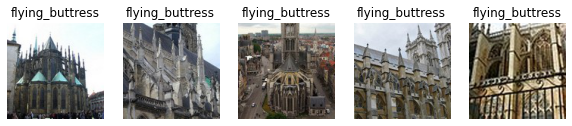

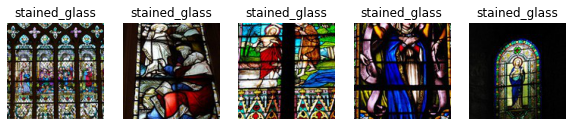

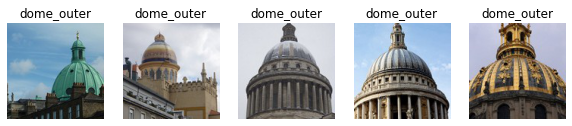

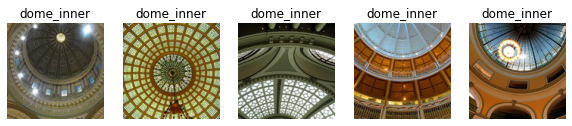

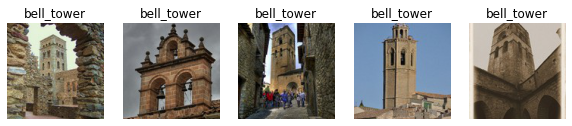

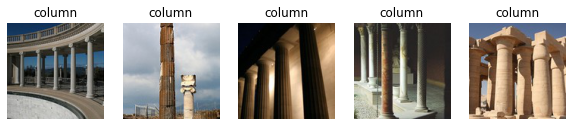

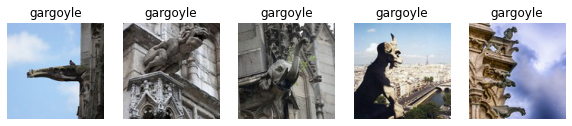

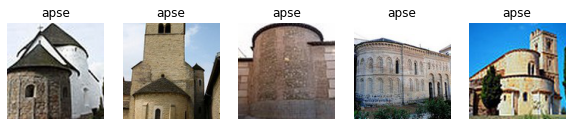

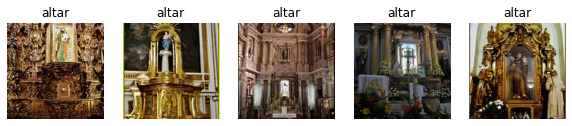

In [0]:
def examples(class_number):
    idx_dato = [np.random.choice(np.where(y_train==class_number)[0]) for i in range(5)]
    f,axx = plt.subplots(1,5,figsize=(10,5))
    for i, dato in enumerate(idx_dato):
        axx[i%5].imshow(X_train[dato])
        axx[i%5].axis('off')
        axx[i%5].set_title(labels[class_number])
    plt.show()
    
for i in range(10):
    examples(i)
    


In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Primer Modelo  ACC:0.71 100 epoch

In [0]:
def get_ann_b1_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(128,128,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer = rmsprop(lr=1e-4, decay=1e-6), loss='categorical_crossentropy', metrics=['acc'])
    return model

model_1 = get_ann_b1_model()

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               33554944  
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [0]:
model_1.compile(optimizer = rmsprop(lr=1e-4, decay=1e-6), loss='categorical_crossentropy', metrics=['acc'])

In [0]:
model_1.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1, validation_data=(X_test,y_test))

Train on 7369 samples, validate on 1843 samples
Epoch 1/100
7369/7369 [==============================] - 4s 506us/step - loss: 1.8684 - acc: 0.3507 - val_loss: 1.6144 - val_acc: 0.4135
Epoch 2/100
7369/7369 [==============================] - 3s 386us/step - loss: 1.4323 - acc: 0.4938 - val_loss: 1.3766 - val_acc: 0.5041
Epoch 3/100
7369/7369 [==============================] - 3s 385us/step - loss: 1.2848 - acc: 0.5440 - val_loss: 1.3018 - val_acc: 0.5366
Epoch 4/100
7369/7369 [==============================] - 3s 385us/step - loss: 1.1783 - acc: 0.5861 - val_loss: 1.4959 - val_acc: 0.4677
Epoch 5/100
7369/7369 [==============================] - 3s 388us/step - loss: 1.0951 - acc: 0.6194 - val_loss: 1.2351 - val_acc: 0.5594
Epoch 6/100
7369/7369 [==============================] - 3s 384us/step - loss: 1.0309 - acc: 0.6510 - val_loss: 1.1981 - val_acc: 0.5811
Epoch 7/100
7369/7369 [==============================] - 3s 385us/step - loss: 0.9675 - acc: 0.6727 - val_loss: 1.1914 - val_acc: 

### Segundo Modelo ACC 0.72 MAXIMO CON 100 EPOCH

In [0]:
def get_ann_b2_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:],activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

model_2 = get_ann_b2_model()


In [0]:
model_2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
model_2.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test),verbose=1)

Train on 7369 samples, validate on 1843 samples
Epoch 1/100
7369/7369 [==============================] - 4s 481us/step - loss: 1.8776 - accuracy: 0.3672 - val_loss: 1.3576 - val_accuracy: 0.5214
Epoch 2/100
7369/7369 [==============================] - 3s 407us/step - loss: 1.1312 - accuracy: 0.6044 - val_loss: 1.0967 - val_accuracy: 0.6224
Epoch 3/100
7369/7369 [==============================] - 3s 407us/step - loss: 0.8549 - accuracy: 0.7100 - val_loss: 0.9426 - val_accuracy: 0.6734
Epoch 4/100
7369/7369 [==============================] - 3s 408us/step - loss: 0.6279 - accuracy: 0.7924 - val_loss: 0.8726 - val_accuracy: 0.6994
Epoch 5/100
7369/7369 [==============================] - 3s 405us/step - loss: 0.4356 - accuracy: 0.8617 - val_loss: 0.9195 - val_accuracy: 0.6972
Epoch 6/100
7369/7369 [==============================] - 3s 406us/step - loss: 0.2511 - accuracy: 0.9282 - val_loss: 0.9634 - val_accuracy: 0.6961
Epoch 7/100
7369/7369 [==============================] - 3s 405us/step

## TERCERA OPCION  0.85 100 EPOCH

In [0]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_6 = define_model()
#model_6.summary()
model_6.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_data=(X_test,y_test))

Train on 7369 samples, validate on 1843 samples
Epoch 1/50
7369/7369 [==============================] - 16s 2ms/step - loss: 1.5179 - accuracy: 0.5045 - val_loss: 4.1069 - val_accuracy: 0.1910
Epoch 2/50
7369/7369 [==============================] - 15s 2ms/step - loss: 1.0024 - accuracy: 0.6660 - val_loss: 3.4998 - val_accuracy: 0.2653
Epoch 3/50
7369/7369 [==============================] - 15s 2ms/step - loss: 0.7969 - accuracy: 0.7293 - val_loss: 1.5919 - val_accuracy: 0.5003
Epoch 4/50
7369/7369 [==============================] - 15s 2ms/step - loss: 0.6756 - accuracy: 0.7746 - val_loss: 0.9222 - val_accuracy: 0.6891
Epoch 5/50
7369/7369 [==============================] - 15s 2ms/step - loss: 0.5643 - accuracy: 0.8074 - val_loss: 0.8108 - val_accuracy: 0.7547
Epoch 6/50
7369/7369 [==============================] - 15s 2ms/step - loss: 0.5744 - accuracy: 0.8069 - val_loss: 2.1691 - val_accuracy: 0.5339
Epoch 7/50
7369/7369 [==============================] - 15s 2ms/step - loss: 0.479

### Test y Predicción

In [0]:
test = pd.read_csv('sample_submission.csv')
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test_images/'+'test_'+str(i)+'.jpg',grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
XTest = np.array(test_image)

In [0]:
XTest.shape

In [0]:
prediction = model_6.predict_classes(XTest)

In [0]:
prediction_label = list()
for i in range(prediction.shape[0]):
    prediction_label.append(labels[prediction[i]])
prediction_label = np.array(prediction_label)   

In [0]:
test['Expected']=prediction_label
test.to_csv('testmodel6.csv', header=True, index=False)

## USANDO RESNET 

In [0]:
batch_size = 32  # orig paper trained all networks with batch_size=128
epochs = 200
data_augmentation = True
num_classes = 10
n = 3
version = 2
input_shape = X_train.shape[1:]
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [0]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [0]:
def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [0]:
def resnet_v2(input_shape, depth, num_classes=10):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [0]:
if version == 2:
  model = resnet_v2(input_shape=input_shape, depth=depth)
else:
  model = resnet_v1(input_shape=input_shape, depth=depth)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
model_type = 'ResNet%dv%d' % (depth, version)
# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

Learning rate:  0.001
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0][0]      
______________________________________________________________________

In [0]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        validation_data=(X_test, y_test),
                        epochs=epochs, verbose=1,workers=4,
                        callbacks=callbacks)


Using real-time data augmentation.
Epoch 1/200
Learning rate:  0.001
231/231 [==============================] - 86s 373ms/step - loss: 1.9577 - accuracy: 0.5142 - val_loss: 6.8301 - val_accuracy: 0.3342
Epoch 2/200
Learning rate:  0.001


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


231/231 [==============================] - 71s 308ms/step - loss: 1.5046 - accuracy: 0.6677 - val_loss: 1.7873 - val_accuracy: 0.5925
Epoch 3/200
Learning rate:  0.001
231/231 [==============================] - 71s 307ms/step - loss: 1.3379 - accuracy: 0.7048 - val_loss: 2.1016 - val_accuracy: 0.5676
Epoch 4/200
Learning rate:  0.001
231/231 [==============================] - 71s 308ms/step - loss: 1.1790 - accuracy: 0.7451 - val_loss: 1.3780 - val_accuracy: 0.6880
Epoch 5/200
Learning rate:  0.001
231/231 [==============================] - 71s 308ms/step - loss: 1.0821 - accuracy: 0.7703 - val_loss: 3.2776 - val_accuracy: 0.5024
Epoch 6/200
Learning rate:  0.001
231/231 [==============================] - 71s 307ms/step - loss: 0.9841 - accuracy: 0.7901 - val_loss: 7.8849 - val_accuracy: 0.3565
Epoch 7/200
Learning rate:  0.001
231/231 [==============================] - 71s 307ms/step - loss: 0.9026 - accuracy: 0.8104 - val_loss: 1.8684 - val_accuracy: 0.6549
Epoch 8/200
Learning rate:

In [0]:
test = pd.read_csv('sample_submission.csv')
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test_images/'+'test_'+str(i)+'.jpg',grayscale=False)
    img = image.img_to_array(img)
    img = img.astype(np.float32)
    img = img/255
    test_image.append(img)
XTest = np.array(test_image)


100%|██████████| 1023/1023 [00:00<00:00, 1767.97it/s]


In [0]:
prediction = model.predict(XTest)
a=np.argmax(prediction,axis=1)
prediction_label = list()
for i in range(a.shape[0]):
    prediction_label.append(labels[a[i]])
prediction_label = np.array(prediction_label)   
test['Expected']=prediction_label
test.to_csv('testmodelrest2.csv', header=True, index=False)